<a href="https://colab.research.google.com/github/Med-Moetez/IBIDS/blob/master/ferdawes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip

--2024-04-26 08:55:47--  http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235102953 (224M) [application/zip]
Saving to: ‘MachineLearningCSV.zip’

MachineLearningCSV. 100%[===================>] 224.21M  1.30MB/s    in 2m 52s  

2024-04-26 08:58:39 (1.30 MB/s) - ‘MachineLearningCSV.zip’ saved [235102953/235102953]



In [ ]:
!unzip -u /content/MachineLearningCSV.zip

Archive:  /content/MachineLearningCSV.zip
   creating: MachineLearningCVE/
  inflating: MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  


In [ ]:
w1 = pd.read_csv('MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')
w2 = pd.read_csv('MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
w3 = pd.read_csv('MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
w4 = pd.read_csv('MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
w5 = pd.read_csv('MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
w6 = pd.read_csv('MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
w7 = pd.read_csv('MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
w8 = pd.read_csv('MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [ ]:
df = pd.concat((w1, w2, w3, w4, w5, w6, w7, w8), axis=0)

In [ ]:

df.shape

(2830743, 79)

In [ ]:
df.head(45)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,389,433,11,4,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,1088,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,80,579225,132,150,160,320799,160,0,1.212121,13.926212,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,49666,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,49413,4,3,0,18,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.columns = df.columns.str.strip()
df = df.drop(columns=['Fwd Header Length.1'])
df.shape

(2830743, 78)

In [ ]:
df['Label'].unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed', 'FTP-Patator', 'SSH-Patator',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [ ]:
df.replace('Infinity', -1, inplace=True)
df[["Flow Bytes/s", "Flow Packets/s"]] = df[["Flow Bytes/s", "Flow Packets/s"]].apply(pd.to_numeric)

In [ ]:
df.describe(include="all")

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENIGN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2273097
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06,NaN
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07,NaN
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN


In [ ]:
df.isna().any()

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                          False
Length: 78, dtype: bool

In [ ]:
df.isnull().any()

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                          False
Length: 78, dtype: bool

In [ ]:
df.replace([np.inf, -np.inf, np.nan], -1, inplace=True)

In [ ]:
string_features = list(df.select_dtypes(include=['object']).columns)
string_features.remove('Label')

In [ ]:
le = preprocessing.LabelEncoder()
df[string_features] = df[string_features].apply(lambda col: le.fit_transform(col))

In [ ]:
benign_total = len(df[df['Label'] == "BENIGN"])
benign_total

2273097

In [ ]:
attack_total = len(df[df['Label'] != "BENIGN"])
attack_total

557646

In [ ]:
df.to_csv("web_attacks_unbalanced.csv", index=False)
df['Label'].value_counts()

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [ ]:
enlargement = 1.1
benign_included_max = attack_total / 30 * 70
benign_inc_probability = (benign_included_max / benign_total) * enlargement
print(benign_included_max, benign_inc_probability)

1301174.0 0.6296657819705891


import random
indexes = []
benign_included_count = 0
for index, row in df.iterrows():
    if (row['Label'] != "BENIGN"):
        indexes.append(index)
    else:
        # Copying with benign_inc_probability
        if random.random() > benign_inc_probability: continue
        # Have we achieved 70% (5087 records)?
        if benign_included_count > benign_included_max: continue
        benign_included_count += 1
        indexes.append(index)
df_balanced = df.loc[indexes]

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
#5087 records

temp = df.sample(n=5087)
temp.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
442011,40294,83,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
356755,53,36410,1,1,62,121,62,62,62.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
27231,80,7937,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56141,443,33612690,17,12,889,9062,405,0,52.294118,113.929674,...,32,201827.0,0.0,201827,201827,33400000.0,0.0,33400000,33400000,BENIGN
238008,80,36995,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
temp['Label'].value_counts()

Label
BENIGN                      4068
DoS Hulk                     427
PortScan                     292
DDoS                         229
DoS GoldenEye                 22
FTP-Patator                   12
SSH-Patator                   11
DoS Slowhttptest               8
Bot                            7
DoS slowloris                  7
Web Attack � Brute Force       4
Name: count, dtype: int64

In [ ]:
temp.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
df_balanced = temp
df_balanced.to_csv("web_attacks_balanced.csv", index=False)

In [ ]:
df = pd.read_csv('web_attacks_balanced.csv')

In [ ]:
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)


In [ ]:
y = df['Label'].values
X = df.drop(columns=['Label'])
print(X.shape, y.shape)

(5087, 77) (5087,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 2838, 1: 722}

In [ ]:
#Recursive feature elimination
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

a = [i[0] for i in feature_map]
X_train = X_train.iloc[:,a]
X_test = X_test.iloc[:,a]

In [ ]:
from sklearn import tree
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<Axes: xlabel='feature'>

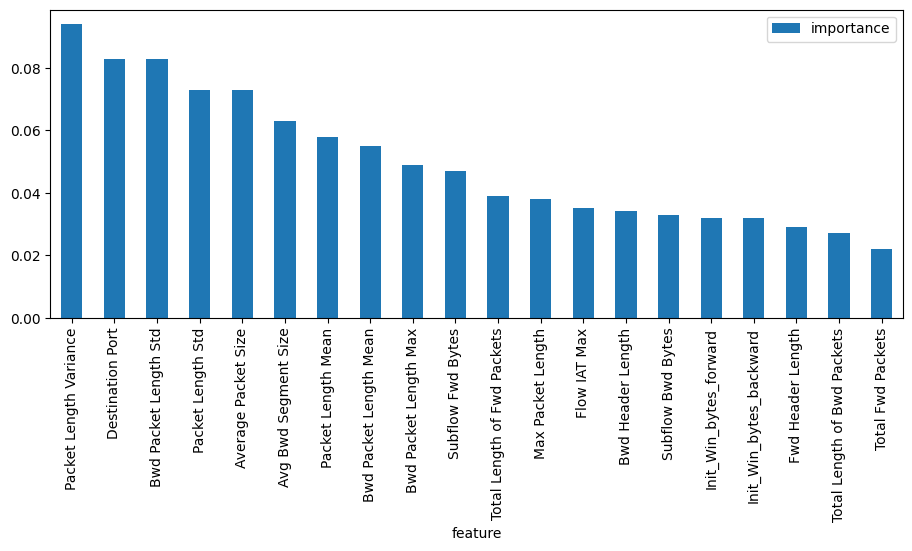

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, y_train);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [ ]:
import numpy as np

y_pred = rfc.predict(X_test)
print (str(y_pred))

[0 0 0 ... 0 0 0]


In [ ]:
import sklearn.metrics as metrics
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Precision = 0.996551724137931
Recall = 0.9730639730639731
F1 = 0.9846678023850085


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Initialisation du classifieur de forêt aléatoire
clf = RandomForestClassifier()

# Formation du modèle
clf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = clf.predict(X_test)

# Calcul de l'exactitude
accuracy = accuracy_score(y_test, y_pred)

# Rapport de classification
report = classification_report(y_test, y_pred)

# Affichage des résultats
print('Accuracy:', accuracy)
print('Classification Report:\n', report)


Accuracy: 0.9927963326784545
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1230
           1       1.00      0.96      0.98       297

    accuracy                           0.99      1527
   macro avg       1.00      0.98      0.99      1527
weighted avg       0.99      0.99      0.99      1527



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:\n', report)


Accuracy: 0.9862475442043221
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1230
           1       0.96      0.97      0.96       297

    accuracy                           0.99      1527
   macro avg       0.98      0.98      0.98      1527
weighted avg       0.99      0.99      0.99      1527



In [ ]:
import sklearn.metrics as metrics
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Precision = 1.0
Recall = 0.9629629629629629
F1 = 0.9811320754716981


Taux de Faux Positifs (FPR) : 0.00975609756097561
Matrice de Confusion :
 [[1218   12]
 [   9  288]]


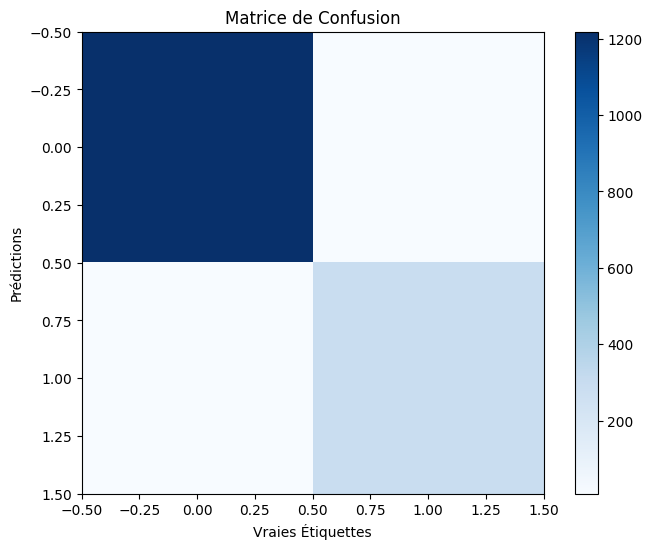

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Supposons que y_true sont les vraies étiquettes et y_pred sont les prédictions de votre modèle.
# Créez une matrice de confusion.
cm = confusion_matrix(y_test, y_pred)

# Obtenez le nombre de faux positifs (FP) à partir de la matrice de confusion.
fp = cm[0][1]

# Calculez le taux de faux positifs (FPR).
fpr = fp / (fp + cm[0][0])

# Affichez le taux de faux positifs.
print("Taux de Faux Positifs (FPR) :", fpr)

# Vous pouvez également afficher la matrice de confusion complète.
print("Matrice de Confusion :\n", cm)

# Si vous souhaitez visualiser davantage d'informations sur la matrice de confusion, vous pouvez utiliser Matplotlib.
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.colorbar()
plt.xlabel("Vraies Étiquettes")
plt.ylabel("Prédictions")
plt.show()


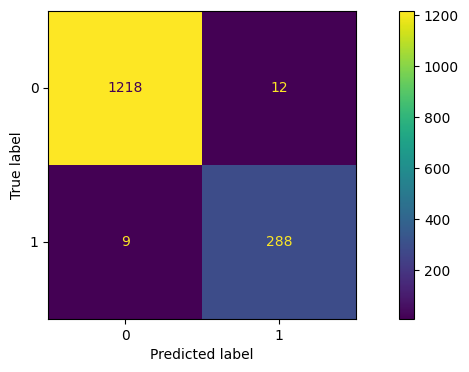

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

AUC: 0.979970436067997


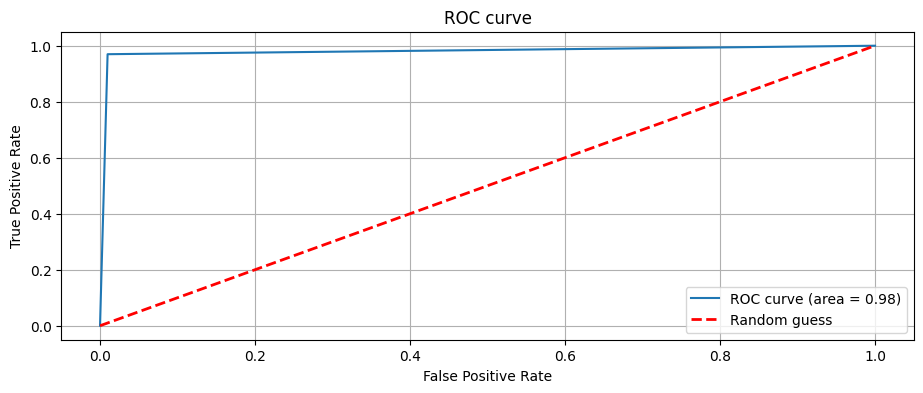

In [ ]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [ ]:
!pip install web3
# !pip install ethereum
!pip install eth-account

In [ ]:
from web3 import Web3
from eth_account import Account

infura_project_id = "76d745c4b363426e8895c5026d60a3aa"

network_url = f"https://sepolia.infura.io/v3/{infura_project_id}"

w3 = Web3(Web3.HTTPProvider(network_url))

contract_abi = [  {
        "anonymous": False,
        "inputs": [
            {"indexed": True, "internalType": "address", "name": "owner", "type": "address"},
            {"indexed": False, "internalType": "string", "name": "alert", "type": "string"},
        ],
        "name": "AlertAdded",
        "type": "event",
    }]
    {
        "anonymous": False,
        "inputs": [
            {"indexed": True, "internalType": "address", "name": "owner", "type": "address"},
            {"indexed": False, "internalType": "string", "name": "alert", "type": "string"},
        ],
        "name": "AlertAdded",
        "type": "event",
    },
    {
        "inputs": [{"internalType": "string", "name": "_alert", "type": "string"}],
        "name": "addAlert",
        "outputs": [],
        "stateMutability": "nonpayable",
        "type": "function",
    },
    {
        "inputs": [{"internalType": "uint256", "name": "", "type": "uint256"}],
        "name": "alerts",
        "outputs": [{"internalType": "string", "name": "", "type": "string"}],
        "stateMutability": "view",
        "type": "function",
    },
    {
        "inputs": [{"internalType": "uint256", "name": "index", "type": "uint256"}],
        "name": "getAlert",
        "outputs": [{"internalType": "string", "name": "", "type": "string"}],
        "stateMutability": "view",
        "type": "function",
    },
    {
        "inputs": [],
        "name": "getAlertsCount",
        "outputs": [{"internalType": "uint256", "name": "", "type": "uint256"}],
        "type": "function",
    },
    {
        "inputs": [],
        "name": "getAllAlerts",
        "outputs": [{"internalType": "string[]", "name": "", "type": "string[]"}],
        "type": "function",
    },
]

contract_address = "0x30ba1fa0373ea06364aec715e87bc09566c0a826"


private_key = "0x9be79d62853a8b12140f9db8ec132636b9b40f7dcf8cbc3e0be6066eac729e93"

acct = w3.eth.account.from_key(private_key)


receipt = w3.eth.get_transaction_receipt("0xead62b9101147a49541d953f2debf14c7c7509545d90c435b3c97006d096c67e")
deployed_addr = receipt["contractAddress"]

alert_contract= w3.eth.contract(address=deployed_addr, abi=contract_abi)

#alertData= str(y_pred)
alertData = "%s" % [{'event': event, 'decision': decision} for event, decision in zip(X_test, y_pred)]
print(alertData)

unsent_alert_tx = alert_contract.functions.addAlert(alertData).build_transaction({
    "from": acct.address,
    "nonce": w3.eth.get_transaction_count(acct.address),
})
signed_tx = w3.eth.account.sign_transaction(unsent_alert_tx, private_key=acct.key)

tx_hash = w3.eth.send_raw_transaction(signed_tx.rawTransaction)

tx_has_hex=tx_hash.hex()

print('transaction hash',tx_has_hex)


print(f'https://sepolia.etherscan.io/tx/{tx_has_hex}')


[{'event': 'Destination Port', 'decision': 0}, {'event': 'Total Fwd Packets', 'decision': 0}, {'event': 'Total Length of Fwd Packets', 'decision': 0}, {'event': 'Total Length of Bwd Packets', 'decision': 1}, {'event': 'Bwd Packet Length Max', 'decision': 0}, {'event': 'Bwd Packet Length Mean', 'decision': 0}, {'event': 'Bwd Packet Length Std', 'decision': 0}, {'event': 'Flow IAT Max', 'decision': 1}, {'event': 'Fwd Header Length', 'decision': 1}, {'event': 'Bwd Header Length', 'decision': 0}, {'event': 'Max Packet Length', 'decision': 0}, {'event': 'Packet Length Mean', 'decision': 0}, {'event': 'Packet Length Std', 'decision': 1}, {'event': 'Packet Length Variance', 'decision': 1}, {'event': 'Average Packet Size', 'decision': 0}, {'event': 'Avg Bwd Segment Size', 'decision': 1}, {'event': 'Subflow Fwd Bytes', 'decision': 0}, {'event': 'Subflow Bwd Bytes', 'decision': 0}, {'event': 'Init_Win_bytes_forward', 'decision': 0}, {'event': 'Init_Win_bytes_backward', 'decision': 0}]
transactio

In [ ]:
from pprint import pprint

latest_event = alert_contract.events.AlertAdded().get_logs(
    fromBlock=0, toBlock="latest",
)[-1]

dict_representation = latest_event.__dict__

pprint(dict_representation)



{'address': '0x30bA1fA0373ea06364AeC715E87bC09566C0A826',
 'args': AttributeDict({'owner': '0xa664fe49a509b242FfF14cAa8Ad7eA876473bD9e', 'alert': "[{'event': 'Destination Port', 'decision': 0}, {'event': 'Total Fwd Packets', 'decision': 0}, {'event': 'Total Length of Fwd Packets', 'decision': 0}, {'event': 'Total Length of Bwd Packets', 'decision': 1}, {'event': 'Bwd Packet Length Max', 'decision': 0}, {'event': 'Bwd Packet Length Mean', 'decision': 0}, {'event': 'Bwd Packet Length Std', 'decision': 0}, {'event': 'Flow IAT Max', 'decision': 1}, {'event': 'Fwd Header Length', 'decision': 1}, {'event': 'Bwd Header Length', 'decision': 0}, {'event': 'Max Packet Length', 'decision': 0}, {'event': 'Packet Length Mean', 'decision': 0}, {'event': 'Packet Length Std', 'decision': 1}, {'event': 'Packet Length Variance', 'decision': 1}, {'event': 'Average Packet Size', 'decision': 0}, {'event': 'Avg Bwd Segment Size', 'decision': 1}, {'event': 'Subflow Fwd Bytes', 'decision': 0}, {'event': 'Subf